<a href="https://colab.research.google.com/github/ditodewantoro/BENGKEL-KODING/blob/main/UAS_BENGKOD_A11_2022_14105_Eustachius_Dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("ObesityDataSet.csv")

# 1. Menampilkan 5 baris pertama
print("🔹 1. Lima Baris Pertama:")
print(df.head())

# 2. Menampilkan jumlah baris dan kolom
print("\n🔹 2. Jumlah Baris dan Kolom:")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

# 3. Menampilkan informasi tipe data dan missing values
print("\n🔹 3. Informasi DataFrame:")
print(df.info())

# 4. Menampilkan deskripsi statistik kolom (meskipun semua masih object)
print("\n🔹 4. Deskripsi Statistik:")
print(df.describe(include='all'))


🔹 1. Lima Baris Pertama:
  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_W

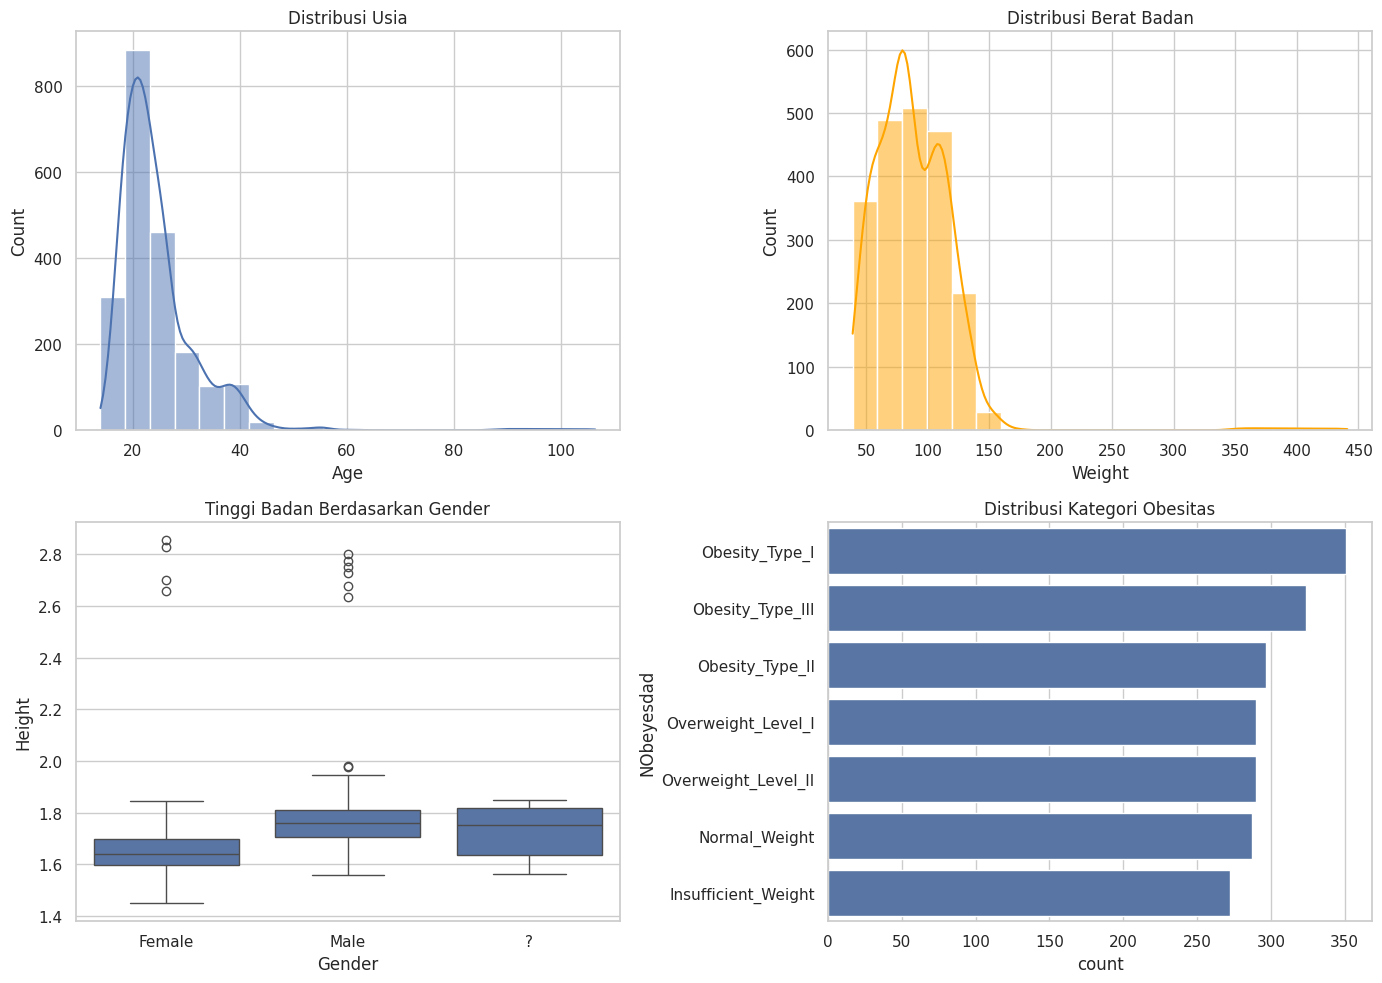

In [3]:
# Salin dataset untuk manipulasi visualisasi
df_vis = df.copy()

# Konversi kolom numerik yang masih bertipe object menjadi float
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numerical_cols:
    df_vis[col] = pd.to_numeric(df_vis[col], errors='coerce')

# Set style visualisasi
sns.set(style="whitegrid")

# Membuat figure dan subplot
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot distribusi usia
sns.histplot(df_vis['Age'].dropna(), kde=True, bins=20, ax=axs[0, 0])
axs[0, 0].set_title('Distribusi Usia')

# Plot distribusi berat badan
sns.histplot(df_vis['Weight'].dropna(), kde=True, bins=20, ax=axs[0, 1], color='orange')
axs[0, 1].set_title('Distribusi Berat Badan')

# Boxplot tinggi badan berdasarkan gender
sns.boxplot(x='Gender', y='Height', data=df_vis, ax=axs[1, 0])
axs[1, 0].set_title('Tinggi Badan Berdasarkan Gender')

# Barplot kategori obesitas
sns.countplot(y='NObeyesdad', data=df_vis, order=df_vis['NObeyesdad'].value_counts().index, ax=axs[1, 1])
axs[1, 1].set_title('Distribusi Kategori Obesitas')

# Menata layout
plt.tight_layout()
plt.show()

Missing Values per Kolom:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Jumlah Nilai Unik per Kolom:
Age                               1394
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP                          

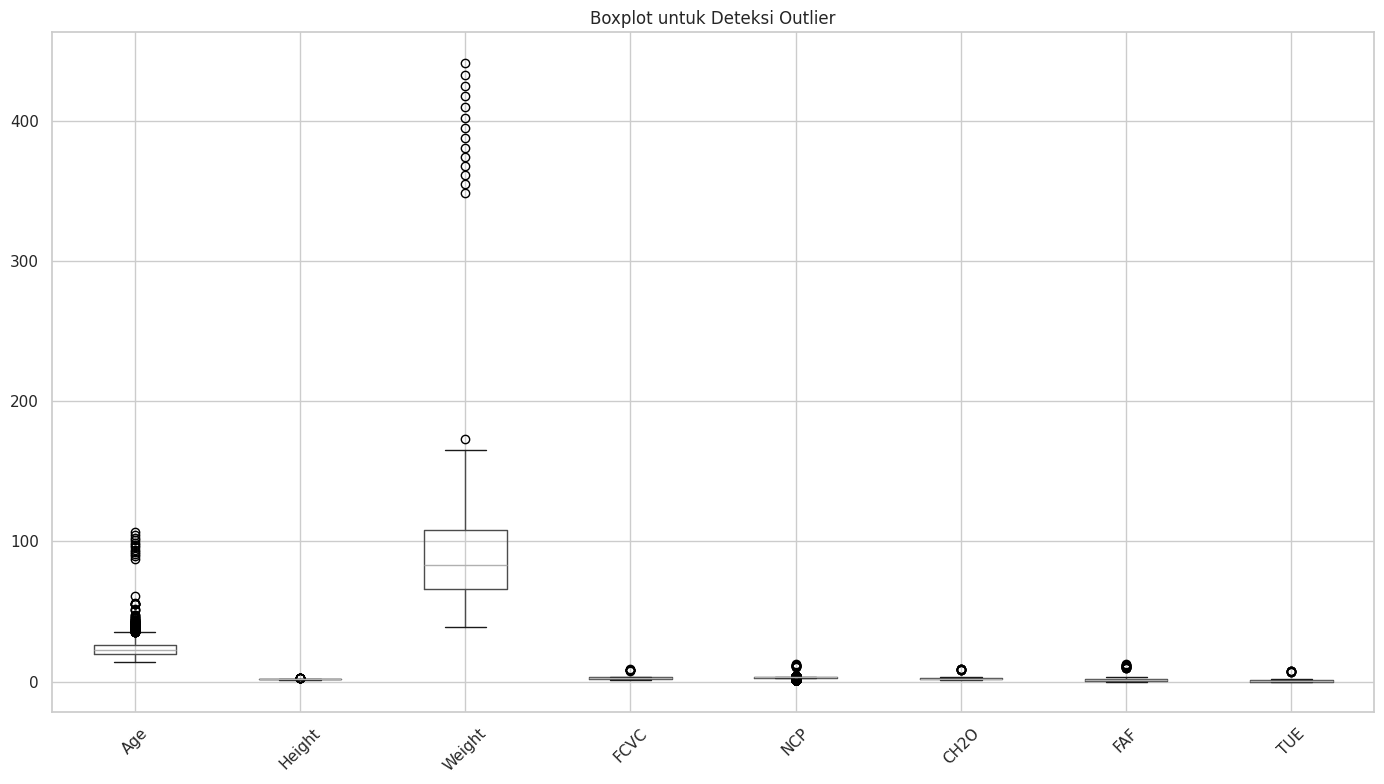

In [4]:
# 1. Cek missing values
print("Missing Values per Kolom:")
print(df.isnull().sum())

# 2. Cek jumlah nilai unik per kolom
print("\nJumlah Nilai Unik per Kolom:")
print(df.nunique())

# 3. Cek data duplikat
print(f"\nJumlah Baris Duplikat: {df.duplicated().sum()}")

# 4. Keseimbangan data pada label target
print("\nDistribusi Kategori Obesitas:")
print(df['NObeyesdad'].value_counts())

# 5. Deteksi outlier menggunakan boxplot
# Konversi kolom numerik
for col in ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Tampilkan boxplot
plt.figure(figsize=(14, 8))
df[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].boxplot()
plt.title("Boxplot untuk Deteksi Outlier")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**KESIMPULAN EDA**
1. Struktur dan Tipe Data
*   Dataset memiliki 2111 baris dan 17 kolom.
*   Semua kolom awalnya bertipe object, termasuk kolom yang seharusnya numerik.
*   Diperlukan konversi tipe data pada kolom seperti Age, Height, Weight, dll. ke tipe numerik (int atau float).

2. Missing Values
*   Beberapa kolom mengandung missing values, misalnya Age, Height, Weight, FCVC, CH2O, dan lain-lain.
*   Penanganan missing values perlu dilakukan sebelum melanjutkan ke model prediktif.

3. Unique Values
*   Kolom numerik mengandung banyak nilai unik yang masuk akal (contoh: Age, Weight, dll.).
*   Kolom kategori seperti Gender, CALC, MTRANS memiliki jumlah nilai unik yang terbatas, cocok untuk encoding kategorikal nantinya.

4. Duplikasi Data
*   Ditemukan sejumlah baris duplikat yang sebaiknya dihapus untuk mencegah bias model.

5. Distribusi dan Keseimbangan Data

*   Distribusi usia dan berat badan tampak normal dengan sedikit skewness.
*   Keseimbangan kelas (label NObeyesdad) tidak merata. Kategori seperti Obesity_Type_I dan Obesity_Type_II mendominasi, sedangkan Insufficient_Weight relatif jarang.

6. Outlier
*   Ditemukan outlier pada beberapa kolom numerik seperti Weight, Height, dan FAF berdasarkan boxplot.














2. Preprocessing Data

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Konversi ke numerik
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop duplikat dan missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Tangani outlier
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Label encoding untuk target
le = LabelEncoder()
df['NObeyesdad'] = le.fit_transform(df['NObeyesdad'])

# One-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Pisah fitur dan target
X = df.drop("NObeyesdad", axis=1)
y = df["NObeyesdad"]

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Buat DataFrame hasil
X_final = pd.DataFrame(X_scaled, columns=X.columns)
y_final = pd.Series(y_resampled, name='NObeyesdad')
df_final = pd.concat([X_final, y_final], axis=1)

# Tampilkan hasil
print(df_final.head())


        Age    Height    Weight      FCVC  NCP      CH2O       FAF       TUE  \
0 -0.448149 -1.156532 -0.864146 -0.773564  0.0 -0.076701 -1.262658  0.460337   
1 -0.448149 -2.349917 -1.165899  1.156600  0.0  1.672112  2.311450 -1.195566   
2  0.032723  0.991561 -0.373796 -0.773564  0.0 -0.076701  1.120081  0.460337   
3  0.994469  0.991561  0.003396  1.156600  0.0 -0.076701  1.120081 -1.195566   
4  1.475341 -1.156532 -1.279057 -0.773564  0.0 -0.076701 -1.262658 -1.195566   

   Gender_Female  Gender_Male  ...  CAEC_Always  CAEC_Frequently  \
0       1.092936    -1.196213  ...    -0.196063        -0.401269   
1       1.092936    -1.196213  ...    -0.196063        -0.401269   
2      -0.914967     0.835972  ...    -0.196063        -0.401269   
3      -0.914967     0.835972  ...    -0.196063        -0.401269   
4      -0.914967     0.835972  ...    -0.196063        -0.401269   

   CAEC_Sometimes   CAEC_no  MTRANS_Automobile  MTRANS_Bike  MTRANS_Motorbike  \
0        0.373673 -0.156757  

Kesimpulan Tahap Preprocessing:
* Missing values dan data duplikat berhasil dihapus.

* Semua kolom numerik telah dikonversi ke tipe numerik.

* Fitur kategorikal dikonversi ke bentuk numerik dengan encoding.

* Outlier dihapus menggunakan metode IQR.

* Ketidakseimbangan data ditangani dengan SMOTE.

* Data numerik telah dinormalisasi menggunakan StandardScaler.